In [43]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, auc, roc_auc_score,roc_curve,recall_score,classification_report

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')
# plt.style.use("fivethirtyeight")

In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['Price'] = boston.target

In [3]:
def barplot_count(data, Column_Name, size=(4,5), width = 0.25, height = 10., hue = None):
    plt.figure(figsize=size)
    plt.title('Count of %s Variable' % (Column_Name))
    palette = sns.color_palette("husl")
    if not hue:
        ax = sns.countplot(Column_Name, data=data, palette=palette, order = data[Column_Name].value_counts().index)
    else:
        ax = sns.countplot(Column_Name, data=data, palette=palette, hue=hue, order = data[Column_Name].value_counts().index)
    
    total = len(data[Column_Name])
    for p in ax.patches:
        height_bar = np.nan_to_num(p.get_height(), 0)
        ax.annotate(height_bar, (p.get_x() + width, p.get_height()+height), fontsize=8)
        
def drop_outliers(data, column):
    iqr = 1.5 * (np.percentile(data[column], 75) - np.percentile(data[column], 25))
    data.drop(data[data[column] > (iqr + np.percentile(data[column], 75))].index, inplace=True)
    data.drop(data[data[column] < (np.percentile(data[column], 25) - iqr)].index, inplace=True)
    return data

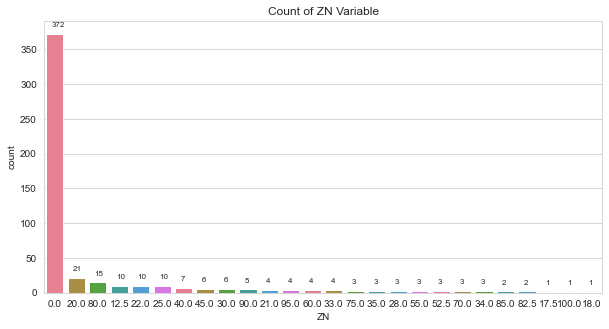

In [4]:
barplot_count(data, 'ZN', size=(10, 5))

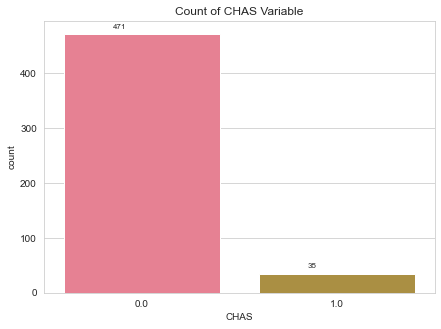

In [5]:
barplot_count(data, 'CHAS', size=(7, 5))

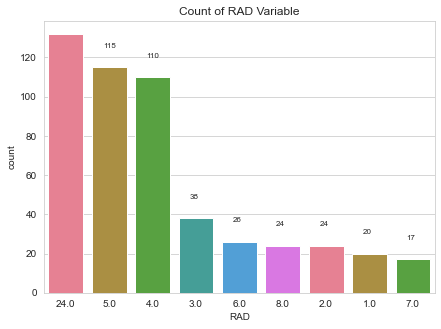

In [6]:
barplot_count(data, 'RAD', size=(7, 5))

In [7]:
# barplot_count(data, 'RM', size=(7, 5))

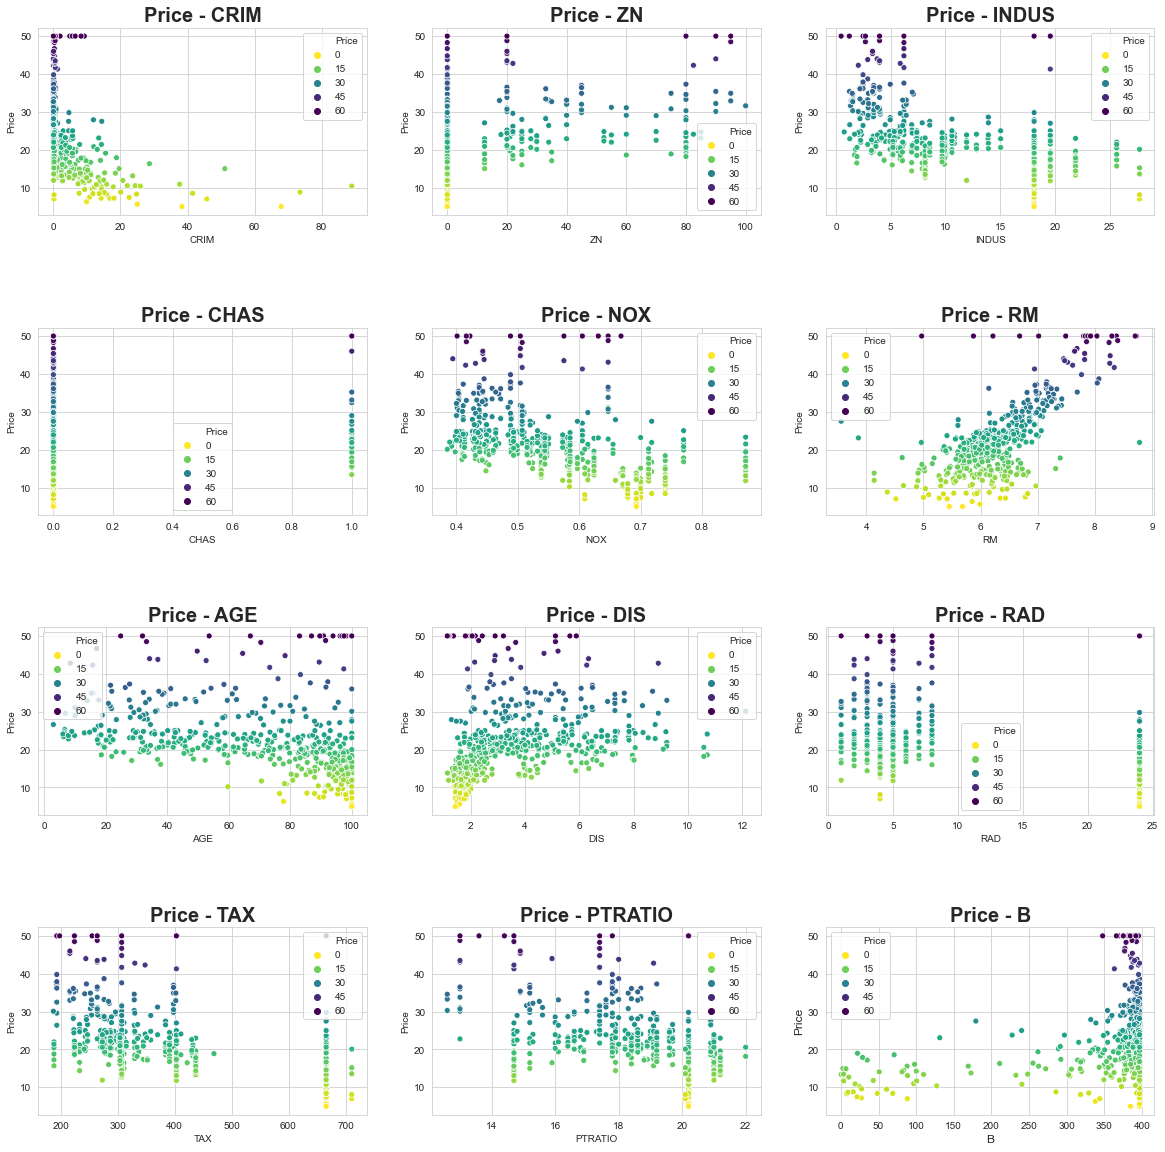

In [8]:
train_num = data.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(4,3,figsize=(20,20))

fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='Price', hue='Price',data=train_num,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Price',fontsize=12)
    ax.set_title('Price'+' - '+str(i),fontweight='bold',size=20)


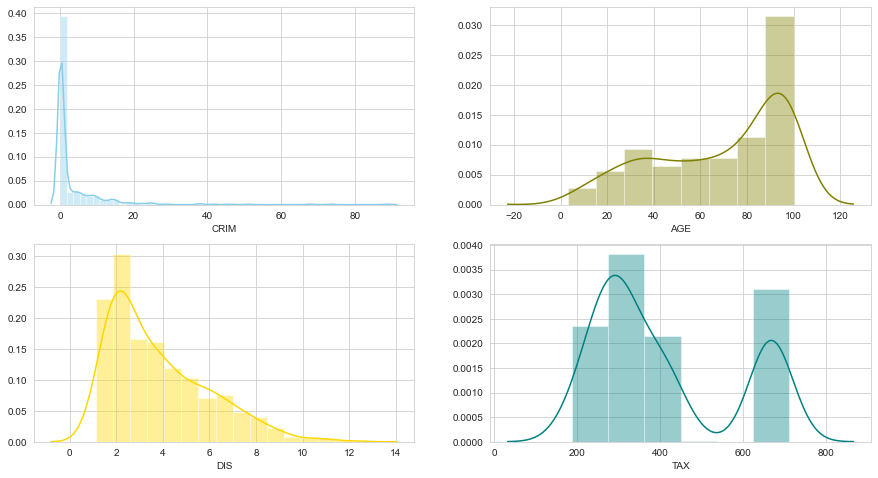

In [10]:
numerical_columns = [column for column in data.columns if data[column].dtype != 'object']

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.distplot(data['CRIM'], kde=True, color="skyblue", ax=axs[0, 0])
sns.distplot(data['AGE'], kde=True, color="olive", ax=axs[0, 1])
sns.distplot(data['DIS'], kde=True, color="gold", ax=axs[1, 0])
sns.distplot(data['TAX'], kde=True, color="teal", ax=axs[1, 1])

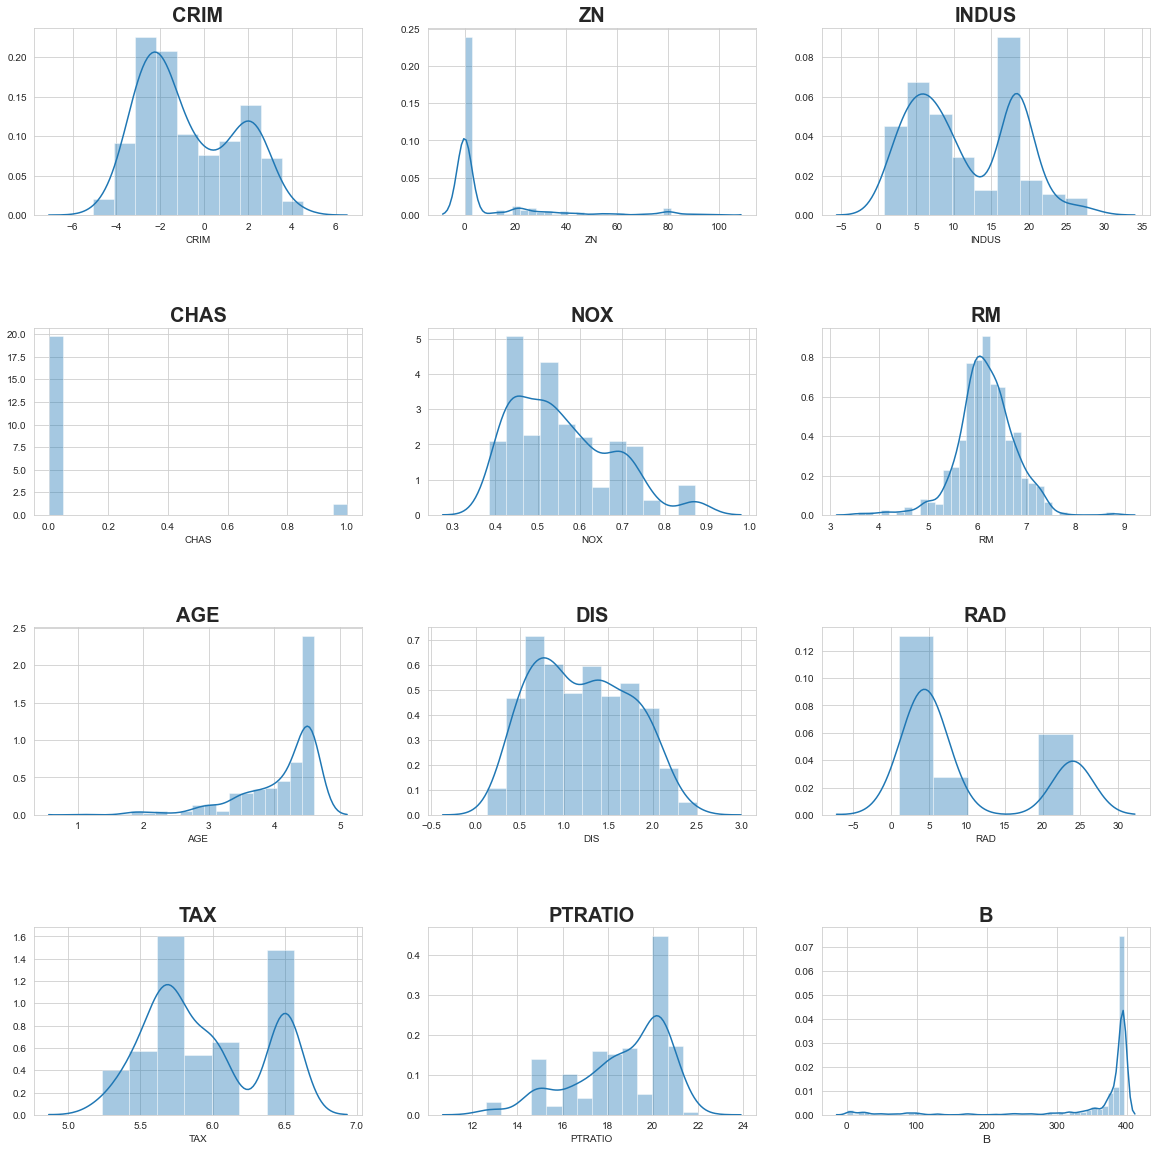

In [44]:
fig,axs= plt.subplots(4,3,figsize=(20,20))

fig.subplots_adjust(hspace=0.6)
for i,ax in zip(numerical_columns,axs.flatten()):
    sns.distplot(data[i], kde=True, hist=True, ax=ax)
    plt.xlabel(i,fontsize=12)
    ax.set_title(str(i), fontweight='bold', size=20)


In [11]:
data['CRIM'] = np.log(data['CRIM'])
data['AGE'] = np.log(data['AGE'])
data['DIS'] = np.log(data['DIS'])
data['TAX'] = np.log(data['TAX'])

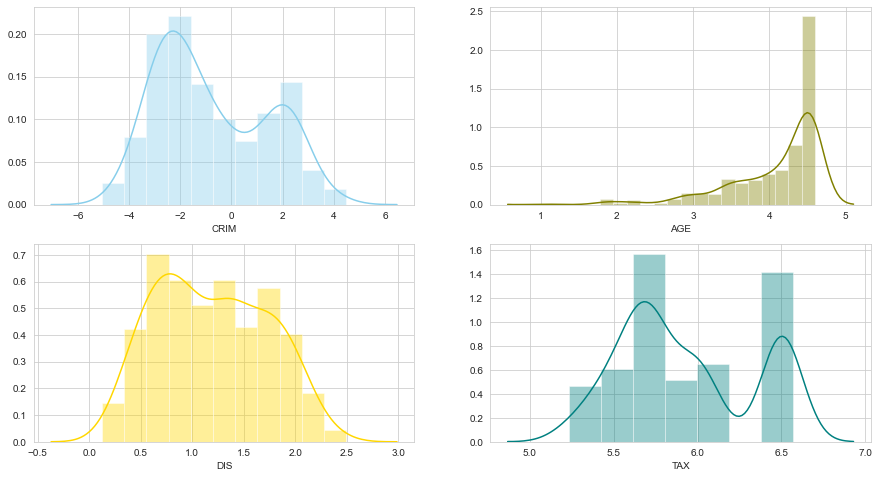

In [12]:
numerical_columns = [column for column in data.columns if data[column].dtype != 'object']

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.distplot(data['CRIM'], kde=True, color="skyblue", ax=axs[0, 0])
sns.distplot(data['AGE'], kde=True, color="olive", ax=axs[0, 1])
sns.distplot(data['DIS'], kde=True, color="gold", ax=axs[1, 0])
sns.distplot(data['TAX'], kde=True, color="teal", ax=axs[1, 1])

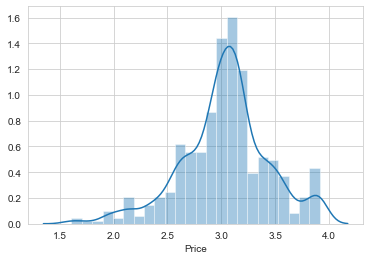

In [13]:
sns.distplot(np.log(data['Price']))

In [14]:
data = drop_outliers(data, 'Price')

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()

In [16]:
feature = data.drop('Price', axis = 1)
target  = data['Price']

In [17]:
data_scaled = rob_scaler.fit_transform(feature)

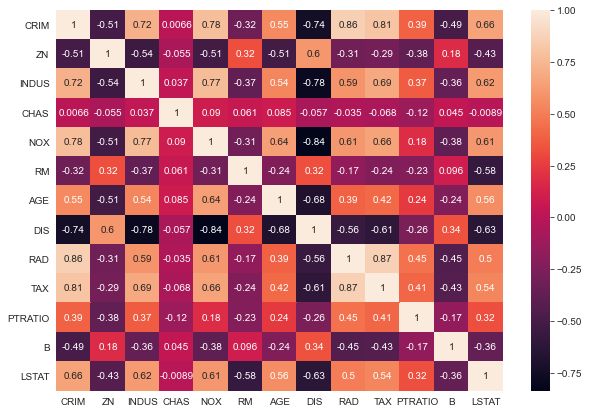

In [18]:
plt.figure(figsize = (10, 7))
sns.heatmap(feature.corr(), annot=True)

In [19]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() 
# data_scaled = scaler.fit_transform(feature)

In [20]:
final_features = pd.DataFrame(data_scaled, columns=feature.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size=0.3, random_state=42)

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
Linear_Regression_Model = LinearRegression()

In [24]:
Linear_Regression_Model.fit(X_train, y_train)

LinearRegression()

In [25]:
predicted_values = Linear_Regression_Model.predict(X_test)

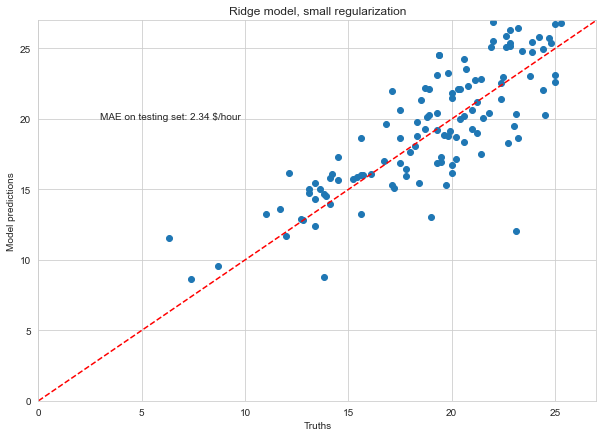

In [26]:
mae = mean_absolute_error(y_test, predicted_values)
string_score = f'\nMAE on testing set: {mae:.2f} $/hour'
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(y_test, predicted_values)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title('Ridge model, small regularization')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

In [27]:
mean_squared_error(y_test, predicted_values)

9.169918800706412

In [28]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(Linear_Regression_Model.coef_))], axis = 1)
coefficients.columns = ['Features', 'Coeff']
coefficients = coefficients.set_index('Features')

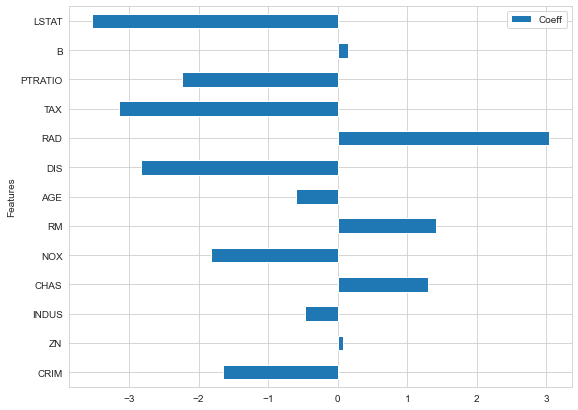

In [29]:
coefficients.plot(kind='barh', figsize=(9, 7))

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, predicted_values)

0.7285107238718369

In [32]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

ridge=Ridge()
params= {'alpha': [5,8,10,10.1,10.2,10.3,10.35,10.36,11,12,15]}
kfold = KFold(shuffle=False, random_state=2, n_splits=3)

grid_ridge=GridSearchCV(ridge, param_grid=params,cv=kfold,scoring='neg_mean_squared_error')
grid_ridge.fit(X_train,y_train)
alpha = grid_ridge.best_params_
ridge_score = grid_ridge.best_score_
print("The best alpha value found is:",alpha['alpha'],'with score:',ridge_score)

ridge_alpha=Ridge(alpha=alpha['alpha'])
ridge_alpha.fit(X_train,y_train)
y_pred_train=ridge_alpha.predict(X_train)
y_pred_test=ridge_alpha.predict(X_test)

print('RMSE train = ',rmsle(y_train,y_pred_train))
print('RMSE test = ',rmsle(y_test,y_pred_test))

The best alpha value found is: 5 with score: -12.44766843590846
RMSE train =  3.367153610209313
RMSE test =  3.1123241174337197


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [34]:
r2_score(y_train,y_pred_train)

0.7541809587675632

In [35]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(ridge_alpha.coef_))], axis = 1)
coefficients.columns = ['Features', 'Coeff']

In [36]:
coefficients

,Features,Coeff
0,CRIM,-0.994546
1,ZN,0.049757
2,INDUS,-0.592160
3,CHAS,1.084040
4,NOX,-1.517701
5,RM,1.524376
6,AGE,-0.594404
7,DIS,-2.119649
8,RAD,1.405867
9,TAX,-2.156625


In [37]:
data_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
data_predict

,Actual,Predicted
55,35.4,29.697744
63,25.0,23.311661
33,13.1,15.401293
330,19.8,23.643870
72,22.8,25.310920
...,...,...
112,18.8,20.127847
331,17.1,22.240579
474,13.8,14.441525
29,21.0,20.030445


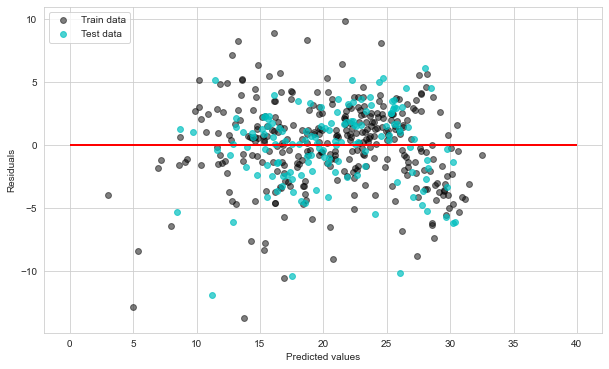

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(y_pred_train, y_pred_train - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.scatter(y_pred_test, y_pred_test - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 40, lw = 2, color = 'red')
plt.show()